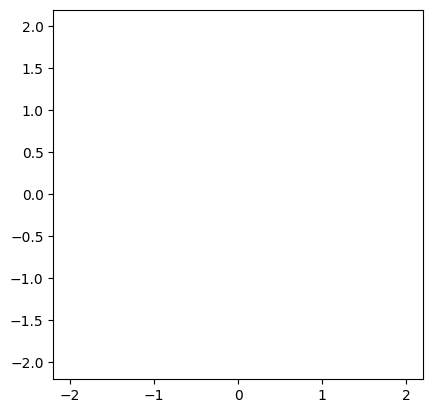

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# PARAMETERS
m1, m2 = 1.0, 1.0
l1, l2 = 1.0, 1.0
g = 9.81

def deriv(t, y):
    # y = [theta1, omega1, theta2, omega2]
    theta1, w1, theta2, w2 = y
    d = theta1 - theta2
    den = 2*m1 + m2 - m2 * np.cos(2*d)
    # theta1_ddot
    num1 = -g*(2*m1 + m2)*np.sin(theta1) \
           - m2*g*np.sin(theta1 - 2*theta2) \
           - 2*np.sin(d)*m2*(l2*w2**2 + l1*w1**2*np.cos(d))
    theta1_dd = num1 / (l1 * den)
    # theta2_ddot
    num2 = 2*np.sin(d) * ( l1*(m1 + m2)*w1**2 \
           + g*(m1 + m2)*np.cos(theta1) \
           + l2*m2*w2**2*np.cos(d) )
    theta2_dd = num2 / (l2 * den)
    return [w1, theta1_dd, w2, theta2_dd]

# initial conditions
theta1_0 = np.radians(120.0)
theta2_0 = np.radians(-10.0)
w1_0 = 0.0
w2_0 = 0.0
y0 = [theta1_0, w1_0, theta2_0, w2_0]

t_max = 20.0
dt = 0.01
t_eval = np.arange(0, t_max, dt)

sol = solve_ivp(deriv, [0, t_max], y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)

theta1 = sol.y[0]
theta2 = sol.y[2]

# positions
x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)
x2 = x1 + l2 * np.sin(theta2)
y2 = y1 - l2 * np.cos(theta2)

# Animation
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_xlim(-(l1 + l2) - 0.2, (l1 + l2) + 0.2)
ax.set_ylim(-(l1 + l2) - 0.2, (l1 + l2) + 0.2)

line, = ax.plot([], [], lw=2)   # rod
mass1, = ax.plot([], [], 'o', markersize=8)
mass2, = ax.plot([], [], 'o', markersize=8)
trace, = ax.plot([], [], '-', linewidth=1, alpha=0.6)  # trace of mass2

trace_x, trace_y = [], []

def init():
    line.set_data([], [])
    mass1.set_data([], [])
    mass2.set_data([], [])
    trace.set_data([], [])
    return line, mass1, mass2, trace

def update(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    line.set_data(thisx, thisy)

    mass1.set_data([x1[i]], [y1[i]])  # wrap in list
    mass2.set_data([x2[i]], [y2[i]])  # wrap in list

    trace_x.append(x2[i]); trace_y.append(y2[i])
    if len(trace_x) > 1000:
        trace_x.pop(0); trace_y.pop(0)
    trace.set_data(trace_x, trace_y)

    return line, mass1, mass2, trace


ani = FuncAnimation(fig, update, frames=len(t_eval), init_func=init,
                    blit=True, interval=dt*1000)

plt.show()
# To save: ani.save('double_pendulum.mp4', fps=60)  (needs ffmpeg)
